In [31]:
import numpy as np
import osr_methods as osr
import line_search_methods as lsm
import numdifftools as nd
import matplotlib.pyplot as plt
from timeit import default_timer as timer

#np.set_printoptions(precision=7)

### Questão 1 Letra A

In [32]:
# def f(Xn):
#     return Xn[0]**2 - 3*Xn[0]*Xn[1] + 4*(Xn[1]**2) + Xn[0] - Xn[1]
    
# def grad_f(Xn):
#     return np.array([2*Xn[0] - 3*Xn[1] + 1, -3*Xn[0] + 8*Xn[1] - 1])
    
# def hessian_f(Xn):
#     return np.array([[2, -3],
#                     [-3, 8]], dtype=float)
    
# P0 = np.array([2, 2])
# #P0 = np.array([-1, -3])
# func = 1


### Questão 1 Letra B

In [33]:
# def f(Xn):
#     a = 10
#     b = 1
#     return (1 + a - b*Xn[0] - b*Xn[1])**2 + (b + Xn[0] + a*Xn[1] - b*Xn[0]*Xn[1])**2 
    
# def grad_f(Xn):
#     a = 10
#     b = 1
#     return np.array([2*(-a*(b*(Xn[1]**2) + b - Xn[1]) + (b**2)*Xn[0]*(Xn[1]**2 + 1) - 2*b*Xn[0]*Xn[1] + Xn[0]),
#                     -2*b*(2*a*Xn[0]*Xn[1] + Xn[0]**2 + 1) + 2*a*(a*Xn[1] + Xn[0]) + 2*(b**2)*(Xn[0]**2 + 1)*Xn[1]])
# def hessian_f(Xn):
#     a = 10
#     b = 1
#     hessian = np.zeros((2,2))
#     hessian[0, 0] = 2*(b**2) + 2*((1 - b*Xn[1])**2)
#     hessian[0, 1] = -2*b*(a*Xn[1] + b*(-Xn[0]*Xn[1]) + b + Xn[0]) + 2*(1-b*Xn[1])*(a - b*Xn[0]) + 2*(b**2)
#     hessian[1, 0] = -2*b*(a*Xn[1] + b*(-Xn[0]*Xn[1]) + b + Xn[0]) + 2*(1-b*Xn[1])*(a-b*Xn[0]) + 2*(b**2)
#     hessian[1, 1] = 2*((a-b*Xn[0])**2) + 2*(b**2)
#     return hessian

# #P0 = np.array([10, 2])
# P0 = np.array([-2, -3])
# func = 2

### Questão 2 Letra A

In [34]:
   
def f(Xn):
    return 450 *((np.sqrt((30 + Xn[0])**2 + Xn[1]**2) - 30 )**2) + 300 *((np.sqrt((30 - Xn[0])**2 + Xn[1]**2) - 30)**2) - 360*Xn[1]

def grad_f(Xn):
    return np.array([(900*(Xn[0] + 30)*(np.sqrt((Xn[0] + 30)**2 + Xn[1]**2) - 30))/np.sqrt((Xn[0] + 30)**2 + Xn[1]**2) - (600*(30 - Xn[0])*(np.sqrt((Xn[0] - 30)**2 + Xn[1]**2) - 30))/np.sqrt((Xn[0] - 30)**2 + Xn[1]**2),
                    60*(Xn[1]*(-450/np.sqrt(Xn[0]**2 + 60*Xn[0] + Xn[1]**2 + 900) - 300/np.sqrt(Xn[0]**2 - 60*Xn[0] + Xn[1]**2 + 900) + 25) - 6)])
    
def hessian_f(Xn):
    hessian = np.zeros((2,2))
    hessian[0, 0] = -(600*(30 - Xn[0])**2*(np.sqrt((30 - Xn[0])**2 + Xn[1]**2) - 30))/((30 - Xn[0])**2 + Xn[1]**2)**(3/2) + \
    (600*(30 - Xn[0])**2)/((30 - Xn[0])**2 + Xn[1]**2) + \
    (600*(np.sqrt((30 - Xn[0])**2 + Xn[1]**2) - 30))/np.sqrt((30 - Xn[0])**2 + Xn[1]**2) + \
    (900*(np.sqrt((Xn[0] + 30)**2 + Xn[1]**2) - 30))/np.sqrt((Xn[0] + 30)**2 + Xn[1]**2) - \
    (900*(Xn[0] + 30)**2*(np.sqrt((Xn[0] + 30)**2 + Xn[1]**2) - 30))/((Xn[0] + 30)**2 + Xn[1]**2)**(3/2) + \
    (900*(Xn[0] + 30)**2)/((Xn[0] + 30)**2 + Xn[1]**2)
    
    hessian[0, 1] = (600*(30 - Xn[0])*Xn[1]*(np.sqrt((30 - Xn[0])**2 + Xn[1]**2) - 30))/((30 - Xn[0])**2 + Xn[1]**2)**(3/2) - \
    (900*(Xn[0] + 30)*Xn[1]*(np.sqrt((Xn[0] + 30)**2 + Xn[1]**2) - 30))/((Xn[0] + 30)**2 + Xn[1]**2)**(3/2) - \
    (600*(30 - Xn[0])*Xn[1])/((30 - Xn[0])**2 + Xn[1]**2) + \
    (900*(Xn[0] + 30)*Xn[1])/((Xn[0] + 30)**2 + Xn[1]**2)
    
    hessian[1, 0] = (600*(30 - Xn[0])*Xn[1]*(np.sqrt((30 - Xn[0])**2 + Xn[1]**2) - 30))/((30 - Xn[0])**2 + Xn[1]**2)**(3/2) - \
    (900*(Xn[0] + 30)*Xn[1]*(np.sqrt((Xn[0] + 30)**2 + Xn[1]**2) - 30))/((Xn[0] + 30)**2 + Xn[1]**2)**(3/2) - \
    (600*(30 - Xn[0])*Xn[1])/((30 - Xn[0])**2 + Xn[1]**2) + \
    (900*(Xn[0] + 30)*Xn[1])/((Xn[0] + 30)**2 + Xn[1]**2)
    
    hessian[1, 1] = -(600*Xn[1]**2*(np.sqrt((30 - Xn[0])**2 + Xn[1]**2) - 30))/((30 - Xn[0])**2 + Xn[1]**2)**(3/2) - \
    (900*Xn[1]**2*(np.sqrt((Xn[0] + 30)**2 + Xn[1]**2) - 30))/((Xn[0] + 30)**2 + Xn[1]**2)**(3/2) + \
    (600*Xn[1]**2)/((30 - Xn[0])**2 + Xn[1]**2) + \
    (900*Xn[1]**2)/((Xn[0] + 30)**2 + Xn[1]**2) + \
    (600*(np.sqrt((30 - Xn[0])**2 + Xn[1]**2) - 30))/np.sqrt((30 - Xn[0])**2 + Xn[1]**2) + \
    (900*(np.sqrt((Xn[0] + 30)**2 + Xn[1]**2) - 30))/np.sqrt((Xn[0] + 30)**2 + Xn[1]**2)
    
    return hessian


P0 = np.array([0.01, -0.1])
func = 3

### Questão 2 Letra B

In [35]:
# # def premissas(Xn):
# #     dimens = Xn.size
# #     #numero de nos
# #     n = int(dimens/2)

# #     #numero de molas
# #     m = n + 1

# #     #Inicializacao dos vetores com as variaveis do problema
# #     Li = np.zeros(m, dtype=float) # comprimentos iniciais das molas
# #     EA = np.zeros(m, dtype=float)
# #     RHO = np.zeros(m, dtype=float)
# #     W = np.zeros(n, dtype=float) # peso em cada no
    
# #     #Atribuicao dos valores do problema
# #     #Cada mola mede inicialmente 60 sobre numero de molas
# #     #molas a esquerda possuem EA = 27000 e rho 8
# #     #molas a direita possuem EA = 18000 e rho 16
# #     Li = Li + 60/m

# #     EA[ : int(m/2)] = 27000
# #     EA[int(m/2) : ] = 18000
# #     RHO[ : int(m/2)] = 8
# #     RHO[int(m/2) : ] = 16
    
# #     #Calculo dos pesos atuando em cada no
# #     # W[j] = (1/2)*(RHO[j]*Li[j] + RHO[j+1]*Li[j+1])
# #     RHO_e = RHO[:m-1]
# #     RHO_d = RHO[1:m]
# #     Li_e = Li[:m-1]
# #     Li_d = Li[1:m]
# #     W = (1/2)*(RHO_e*Li_e + RHO_d*Li_d)
    
# #     return [n, m, Li, EA, W]

# def f(Xn):
#     dimens = Xn.size
#     #numero de nos
#     n = int(dimens/2)

#     #numero de molas
#     m = n + 1

#     #Inicializacao dos vetores com as variaveis do problema
#     Li = np.zeros(m, dtype=float) # comprimentos iniciais das molas
#     EA = np.zeros(m, dtype=float)
#     RHO = np.zeros(m, dtype=float)
#     W = np.zeros(n, dtype=float) # peso em cada no
    
#     #Atribuicao dos valores do problema
#     #Cada mola mede inicialmente 60 sobre numero de molas
#     #molas a esquerda possuem EA = 27000 e rho 8
#     #molas a direita possuem EA = 18000 e rho 16
#     Li = Li + 60/m

#     EA[ : int(m/2)] = 27000
#     EA[int(m/2) : ] = 18000
#     RHO[ : int(m/2)] = 8
#     RHO[int(m/2) : ] = 16
    
#     #Calculo dos pesos atuando em cada no
#     # W[j] = (1/2)*(RHO[j]*Li[j] + RHO[j+1]*Li[j+1])
#     RHO_e = RHO[:m-1]
#     RHO_d = RHO[1:m]
#     Li_e = Li[:m-1]
#     Li_d = Li[1:m]
#     W = (1/2)*(RHO_e*Li_e + RHO_d*Li_d)
    
#     Lf = np.zeros(m, dtype=float) # comprimentos finais das molas
#     U = np.zeros(m, dtype=float) # energia elastica das molas0.01, -0.1    
#     V = np.zeros(n, dtype=float) # trabalho em cada no (desloc vert)  
      
#     #array com os deslocamentos horizontais do Xn
#     dx = Xn[0::2].copy()
#     #array com os deslocamentos verticais do Xn
#     dy = Xn[1::2].copy()
       
#     #Calculo dos comprimentos finais
#     # Lf[0] = np.sqrt( (Li[0] + dx[0] )**2 + dy[0]**2 ) 
#     # Lf[k] = np.sqrt(a**2 + b**2)
#     # Lf[m-1] = np.sqrt((Li[m-1] - dx[n-1])**2 + dy[n-1]**2)
#     dx_d = np.zeros(m, dtype= float)
#     dx_d[1:] = dx.copy()    
#     dx_e = np.zeros(m, dtype=float)
#     dx_e[:m-1] = dx.copy()
#     dy_d = np.zeros(m, dtype= float)
#     dy_d[1:] = dy.copy()
#     dy_e = np.zeros(m, dtype=float)
#     dy_e[:m-1] = dy.copy()
    
#     a = Li + dx_e - dx_d
#     b = dy_e - dy_d
    
#     Lf = np.sqrt(a**2 + b**2)
    
#     #calculo da energia elastica em cada mola
#     U = (1/2)*(EA/Li)*((Lf - Li)**2)
    
#     #calculo do trabalho em cada no    
#     V = W*dy
    
#     #Calculo da Energia Total
#     E = np.sum(U) - np.sum(V)
    
#     return E

# def grad_f(Xn):
#     dimens = Xn.size
#     #numero de nos
#     n = int(dimens/2)

#     #numero de molas
#     m = n + 1

#     #Inicializacao dos vetores com as variaveis do problema
#     Li = np.zeros(m, dtype=float) # comprimentos iniciais das molas
#     EA = np.zeros(m, dtype=float)
#     RHO = np.zeros(m, dtype=float)
#     W = np.zeros(n, dtype=float) # peso em cada no
    
#     #Atribuicao dos valores do problema
#     #Cada mola mede inicialmente 60 sobre numero de molas
#     #molas a esquerda possuem EA = 27000 e rho 8
#     #molas a direita possuem EA = 18000 e rho 16
#     Li = Li + 60/m

#     EA[ : int(m/2)] = 27000
#     EA[int(m/2) : ] = 18000
#     RHO[ : int(m/2)] = 8
#     RHO[int(m/2) : ] = 16
    
#     #Calculo dos pesos atuando em cada no
#     # W[j] = (1/2)*(RHO[j]*Li[j] + RHO[j+1]*Li[j+1])
#     RHO_e = RHO[:m-1]
#     RHO_d = RHO[1:m]
#     Li_e = Li[:m-1]
#     Li_d = Li[1:m]
#     W = (1/2)*(RHO_e*Li_e + RHO_d*Li_d)

#     Lf = np.zeros(m, dtype=float) # comprimentos finais das molas
        
#     #array com os deslocamentos horizontais do Xn
#     dx = Xn[0::2].copy()
#     #array com os deslocamentos verticais do Xn
#     dy = Xn[1::2].copy()
    
#     #Calculo dos comprimentos finais
#     # Lf[0] = np.sqrt( (Li[0] + dx[0] )**2 + dy[0]**2 ) 
#     # Lf[k] = np.sqrt(a**2 + b**2)
#     # Lf[m-1] = np.sqrt((Li[m-1] - dx[n-1])**2 + dy[n-1]**2)
#     dx_d = np.zeros(m, dtype= float)
#     dx_d[1:] = dx.copy()
    
#     dx_e = np.zeros(m, dtype=float)
#     dx_e[:m-1] = dx.copy()
#     dy_d = np.zeros(m, dtype= float)
#     dy_d[1:] = dy.copy()
#     dy_e = np.zeros(m, dtype=float)
#     dy_e[:m-1] = dy.copy()
    
#     a = Li + dx_e - dx_d
#     b = dy_e - dy_d
    
#     Lf = np.sqrt(a**2 + b**2)
    
#     #calculo gradiente
#     gradx = np.zeros(n, dtype=float)
#     grady = np.zeros(n, dtype=float)
#     Li_e = np.zeros(n, dtype=float)
#     Li_d = np.zeros(n, dtype=float)
#     EA_e = np.zeros(n, dtype=float)
#     EA_d = np.zeros(n, dtype=float)
#     Lf_e = np.zeros(n, dtype=float)
#     Lf_d = np.zeros(n, dtype=float)
    
#     Li_e = Li[:m-1]
#     Li_d = Li[1:m]
#     EA_e = EA[:m-1]
#     EA_d = EA[1:m]
#     Lf_e = Lf[:m-1]
#     Lf_d = Lf[1:m]
    
#     dx_d = np.zeros(n, dtype=float)   
#     dx_d[1:] = dx[:m-2]
    
#     dy_d = np.zeros(n, dtype=float)  
#     dy_d[1:] = dy[:m-2]
    
#     dx_e = np.zeros(n, dtype=float)
#     dx_e[:m-2] = dx[1:]
    
#     dy_e = np.zeros(n, dtype=float)
#     dy_e[:m-2] = dy[1:]
    
#     deriv1 = np.zeros(n, dtype=float)
#     deriv2 = np.zeros(n, dtype=float)
#     deriv3 = np.zeros(n, dtype=float)
#     deriv4 = np.zeros(n, dtype=float)
#     deriv5 = np.zeros(n, dtype=float)
    
       
#     # deriv1 = (1/2)*((Li[0] + dx[0])**2 + dy[0]**2)**(-1/2)*(2*Li[0] + 2*dx[0])
#     # deriv1 = (1/2)*((Li[k] + dx[k] - dx[k-1])**2 + (dy[k] - dy[k-1])**2)**(-1/2)*(2*Li[k] + 2*dx[k] - 2*dx[k-1])
    
#     deriv1 = (1/2)*((Li_e + dx - dx_d)**2 + (dy - dy_d)**2)**(-1/2)*(2*Li_e + 2*dx - 2*dx_d)        
#     deriv2 = (1/2)*((Li_d + dx_e - dx)**2 + (dy_e - dy)**2)**(-1/2)*(-2*Li_d - 2*dx_e + 2*dx)    
#     deriv3 = (1/2)*((Li_e + dx - dx_d)**2 + (dy - dy_d)**2)**(-1/2)*(2*dy - 2*dy_d)
#     deriv4 = (1/2)*((Li_d + dx_e - dx)**2 + (dy_e - dy)**2)**(-1/2)*(-2*dy_e + 2*dy)
#     deriv5 = W
    
    
#     # dUk/dxk + dU(k+1)/dxk
#     gradx = (1/2)*(EA_e/Li_e)*2*(Lf_e - Li_e)*deriv1 + (1/2)*(EA_d/Li_d)*2*(Lf_d - Li_d)*deriv2
    
#     #dUk/dyk + dU(k+1)/dyk - dVk/dyk
#     grady = (1/2)*(EA_e/Li_e)*2*(Lf_e - Li_e)*deriv3 + (1/2)*(EA_d/Li_d)*2*(Lf_d - Li_d)*deriv4 - deriv5
    
#     grad = np.zeros(2*n, dtype=float)
#     grad[0::2] = gradx
#     grad[1::2] = grady
        
#     return grad

# def hessian_f(Xn):
#     return nd.Hessian(f)(Xn)

# P0 = np.array([0.01, -0.1])    
# #P0 = np.array([0.01,-0.1,0.01,-0.1,0.01,-0.1,0.01,-0.1,0.01,-0.1 ])
# #P0 = np.array([0.01,-0.1,0.02,-0.2,0.03,-0.3,0.04,-0.4,0.05,-0.5 ])
# # P0 = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
# func = 4
# #params = premissas(P0)

# #print(hessian_f(P0))

### Controle Numérico

In [36]:
# numero maximo de iteracoes 
maxiter = 200

# tolerancia para convergencia do gradiente
tol_conv = 1E-5

# tolerancia para a busca unidirecional
tol_search = 1E-5

# delta alpha do passo constante
line_step = 1E-2

#epsilon da maquina
eps = 1E-8

### Seleção do Método de OSR

In [37]:
# 1 - Univariante
# 2 - Powell
# 3 - Steepest Descent
# 4 - Newton Raphson
# 5 - Fletcher Reeves
# 6 - BFGS

metodo = 1


if (metodo == 1):
    n_met = 'Univariante'
elif (metodo == 2):
    n_met = 'Powell'
elif (metodo == 3):
    n_met = 'Steepest Descent'
elif (metodo == 4):
    n_met = 'Newton Raphson'
elif (metodo == 5):
    n_met = 'Fletcher-Reeves'
elif (metodo == 6):
    n_met = 'BFGS'
    
if (func == 1):
    n_func = 'Q1.a'
elif (func == 2):
    n_func = 'Q1.b'
elif (func == 3):
    n_func = 'Q2.a'
elif (func == 4):
  n_func = 'Q2.b'

### Inicializações

In [38]:
passos = 0
dimens = P0.size
Pmin = P0.copy()
listPmin = []
listPmin.append(Pmin)
grad = grad_f(Pmin)
norm_grad = np.linalg.norm(grad)

if (metodo == 2):
    direcoes = np.eye(dimens, dtype=float)
    ciclos = 0
    P1 = P0.copy()
elif (metodo == 5):
    #o metodo recebe a direcao anterior 
    #inicializo a direcao com um vetor de zeros mas que nunca e usado
    #uso apenas para enviar como parametro na primeira iteracao do metodo, o qual atualiza o valor de dir para a iteracao seguinte
    dir = np.zeros((1, dimens))
    grad_last = grad.copy()
elif(metodo == 6):
    S_last = np.eye(dimens)
    grad_last = grad.copy()
    P_last = P0.copy()

### Cálculo do Ponto Mínimo

In [39]:
start = timer()

while (norm_grad > tol_conv):
    if (passos == maxiter):
        print('Nao convergiu')
        break
    passos = passos + 1
    if (metodo == 1):
        dir = osr.univariante(passos, dimens)
    elif (metodo == 2):
        dir, direcoes, P1, ciclos = osr.powell(Pmin, P1, direcoes,passos, ciclos, dimens)
    elif (metodo == 3):
        dir = osr.steepestDescent(grad)
    elif (metodo == 4):
        dir = osr.newtonRaphson(Pmin, grad, hessian_f)
    elif (metodo == 5):
        dir, grad_last = osr.fletcherReeves(dir, grad, grad_last, passos)
    elif (metodo == 6):
        dir, P_last, grad_last, S_last = osr.bfgs(Pmin, P_last, grad, grad_last, S_last, passos, dimens)
     
    intervalo = lsm.passo_cte(dir, Pmin, f, eps, line_step)
    alpha = lsm.secao_aurea(intervalo, dir, Pmin, f, tol_search)
    Pmin = Pmin + alpha*dir
    listPmin.append(Pmin)
    grad = grad_f(Pmin)
    norm_grad = np.linalg.norm(grad)    

end = timer()

tempoExec = end - start


Nao convergiu


### Plot

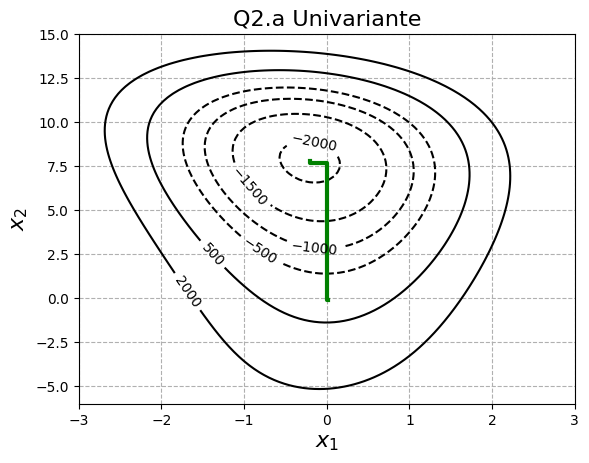

In [40]:
if (func < 4):
    if (func == 1):
        x1 = np.linspace(-6, 3, 100)
        x2 = np.linspace(-4, 2.5, 100)
        X1, X2 = np.meshgrid(x1, x2)
        X3 = f([X1, X2])
        niveis = plt.contour(X1, X2, X3, [0, 1, 3, 8, 15, 25, 40], colors='black')
    elif (func == 2):
        x1 = np.linspace(-5, 25, 100)
        x2 = np.linspace(-10, 10, 100)
        X1, X2 = np.meshgrid(x1, x2)
        X3 = f([X1, X2])
        niveis = plt.contour(X1, X2, X3,[50, 100,200,500, 1000, 2000, 5000], colors='black')
    elif (func == 3):
        x1 = np.linspace(-3, 3, 100)
        x2 = np.linspace(-6, 15, 100)
        X1, X2 = np.meshgrid(x1, x2)
        X3 = f([X1, X2])
        niveis = plt.contour(X1, X2, X3,[-2000,-1500, -1000, -500,500,2000], colors='black')
        
    plt.clabel(niveis, inline=1, fontsize=10)
    x = []
    y = []
    for P in listPmin:
        x.append(P[0])
        y.append(P[1])
        #plt.annotate('', xy=listPmin[i+1], xytext=listPmin[i],
        #            arrowprops=dict(width=1, color='green', headwidth=4, headlength=4, shrink=0.0), fontsize='10')
    #    #plt.plot(pontos[i][0], pontos[i][1], marker="o", markersize=7, markeredgecolor="green", markerfacecolor="green")
    #    #plt.plot(pontos[i+1][0], pontos[i+1][1], marker="o", markersize=1, markeredgecolor="green", markerfacecolor="green")
    plt.plot(x, y, color='g', linewidth='3')
    plt.xlabel('$x_1$', fontsize='16')
    plt.ylabel('$x_2$', fontsize='16')
    plt.grid(linestyle='--')
    titulo = n_func + ' ' + n_met
    plt.title(titulo, fontsize='16')
    file_name = n_func + '_' + n_met + '_P0=' + np.array2string(P0, precision = 2, separator=' ') + '.pdf'
    plt.savefig(file_name, format="pdf")
    plt.show()
elif (func == 4):
    x = []
    y = []
    n = int(dimens/2)
    m = n + 1
    Li = np.zeros(m, dtype=float) # comprimentos iniciais das molas
    Li = Li + 60/m
    print(Li)
    x.append(0)
    y.append(0)
    comp = 0
    for k in np.arange(n):
        comp = comp + Li[k]
        x.append(comp + Pmin[2*k])
        y.append(Pmin[2*k + 1])
    x.append(60)
    y.append(0)
    
    fig, ax = plt.subplots()
    ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
    ax.xaxis.set_label_position('top')
    ax.spines['left'].set_position(('data', 0))
    ax.spines['top'].set_position(('data', 0))

        
    plt.plot(x, y, marker = 'o', color='g', linewidth='3')
    plt.ylim([0, 8])
    plt.xlim([0, 60])
    plt.xlabel('$x$', fontsize='16')
    plt.ylabel('$y$', fontsize='16')
    plt.grid()
    plt.gca().invert_yaxis()
    plt.show()
    